In [1]:
import os
import shutil
from google.colab import drive

# Монтирование Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import zipfile

# Путь к зазипованному датасету и директория, куда его нужно распаковать
zip_path = '/content/drive/MyDrive/Model1/dataset_1.0.zip'
extract_path = '/content/dataset_1.0'

# Распаковка ZIP-файла
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

import shutil

# Путь к зазипованному файлу на Google Drive и путь для копирования в /content/
drive_zip_path = '/content/drive/MyDrive/Model1/dataset_1.0.zip'
local_zip_path = '/content/dataset_1.0.zip'

# Копирование файла
shutil.copy(drive_zip_path, local_zip_path)

# Проверка успешного копирования
if os.path.exists(local_zip_path):
    print(f"Файл {local_zip_path} успешно скопирован.")
else:
    print(f"Ошибка при копировании файла.")


In [42]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Путь к папке
dataset_path = '/content/dataset_1.0'

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")


Всего файлов в папке /content/dataset_1.0 и её вложенных папках: 34201


In [43]:

# Пути к папкам на Google Drive и в /content
drive_images_dir = '/content/drive/MyDrive/Tiled2/train/images'
drive_labels_dir = '/content/drive/MyDrive/Tiled2/train/labels'
existing_images_dir = '/content/dataset_1.0/dataset_1.0/train/images'
existing_labels_dir = '/content//dataset_1.0/dataset_1.0/train/labels'

# Получение списка файлов в каждой папке
drive_image_files = sorted(os.listdir(drive_images_dir))
drive_label_files = sorted(os.listdir(drive_labels_dir))

# Проверка количества файлов в папках на Google Drive
if len(drive_image_files) != len(drive_label_files):
    print("Количество файлов в папках с изображениями и метками на Google Drive не совпадает.")
else:
    print("Количество файлов в папках с изображениями и метками на Google Drive совпадает.")

    # Копирование файлов из папок на Google Drive в /content
    for image_file in drive_image_files:
        shutil.copy(os.path.join(drive_images_dir, image_file), os.path.join(existing_images_dir, image_file))

    for label_file in drive_label_files:
        shutil.copy(os.path.join(drive_labels_dir, label_file), os.path.join(existing_labels_dir, label_file))

    # Вывод первых 3 файлов из каждой папки в существующем


Количество файлов в папках с изображениями и метками на Google Drive совпадает.


In [44]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Путь к папке
dataset_path = '/content/dataset_1.0'

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")


Всего файлов в папке /content/dataset_1.0 и её вложенных папках: 34211


In [45]:
# Импорт библиотек
import os

# Определение путей к папкам
train_image_folder = '/content/dataset_1.0/dataset_1.0/train/images'
train_label_folder = '/content/dataset_1.0/dataset_1.0/train/labels'
val_image_folder = '/content/dataset_1.0/dataset_1.0/valid/images'
val_label_folder = '/content/dataset_1.0/dataset_1.0/valid/labels'
test_image_folder = '/content/dataset_1.0/dataset_1.0/test/images'
test_label_folder = '/content/dataset_1.0/dataset_1.0/test/labels'

# Список файлов для удаления
files_to_remove = [
    'DS1_02_0432.txt', 'DS1_02_0494.txt', 'DS1_02_0050.txt',
    'DS1_02_0423.txt', 'DS1_02_0461.txt', 'DS1_02_0443.txt',
    'DS1_YM2_306.txt', 'DS1_02_0448.txt', 'DS1_02_0518.txt',
    'DS1_02_0490.txt', 'DS1_02_0040.txt', 'DS1_02_0043.txt',
    'DS1_02_0420.txt', 'DS1_02_0034.txt', 'DS1_02_0676.txt',
    'DS1_02_0465.txt', 'DS1_02_0027.txt', 'DS1_02_0454.txt',
    'DS1_02_0499.txt', 'DS1_02_0437.txt', 'DS1_02_0414.txt',
    'DS1_02_0469.txt', 'DS1_YM2_327.txt', 'DS1_9_285.txt',
    'DS1_9_281.txt', 'DS1_9_377.txt','DS1_02_2862.txt','DS1_02_2147.txt'
]

# Функция для удаления файлов
def remove_files(folder, files):
    removed_files = []
    for file in files:
        file_path_txt = os.path.join(folder, file)
        file_path_jpg = os.path.join(folder, file.replace('.txt', '.jpg'))

        if os.path.exists(file_path_txt):
            os.remove(file_path_txt)
            removed_files.append(file)

        if os.path.exists(file_path_jpg):
            os.remove(file_path_jpg)
            removed_files.append(file.replace('.txt', '.jpg'))

    return removed_files

# Удаление файлов из тренировочной, валидационной и тестовой папок
removed_train = remove_files(train_label_folder, files_to_remove)
removed_val = remove_files(val_label_folder, files_to_remove)
removed_test = remove_files(test_label_folder, files_to_remove)

removed_train, removed_val, removed_test
try:
    removed_train = remove_files(train_label_folder, files_to_remove)
    removed_val = remove_files(val_label_folder, files_to_remove)
    removed_test = remove_files(test_label_folder, files_to_remove)

    print("Удалены файлы из тренировочной папки:", removed_train)
    print("Удалены файлы из валидационной папки:", removed_val)
    print("Удалены файлы из тестовой папки:", removed_test)

except Exception as e:
    print("Произошла ошибка при удалении файлов:", str(e))

Удалены файлы из тренировочной папки: []
Удалены файлы из валидационной папки: []
Удалены файлы из тестовой папки: []


In [46]:
# Импорт необходимых библиотек для работы с YOLO и обучения модели
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Импорт библиотек для работы с файловой системой и визуализации
import os
import matplotlib.pyplot as plt

print("Библиотеки успешно импортированы.")


Библиотеки успешно импортированы.


In [47]:

!git clone https://github.com/ultralytics/ultralytics.git

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [48]:

!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()



In [49]:
import yaml

with open("/content/data6.yaml", 'r') as stream:
    try:
        data = yaml.safe_load(stream)
        print("Пути в YAML-файле после обновления:")
        print(data)
    except yaml.YAMLError as exc:
        print(exc)


Пути в YAML-файле после обновления:
{'names': ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Industrial facility', 'Power lines', 'Public facility', 'Residential facility', 'Road', 'Water'], 'nc': 10, 'test': '/content/dataset_1.0/dataset_1.0/test/images', 'test_labels': '/content/dataset_1.0/dataset_1.0/test/labels', 'train': '/content/dataset_1.0/dataset_1.0/train/images', 'train_labels': '/content/dataset_1.0/dataset_1.0/train/labels', 'val': '/content/dataset_1.0/dataset_1.0/valid/images', 'val_labels': '/content/dataset_1.0/dataset_1.0/valid/labels'}


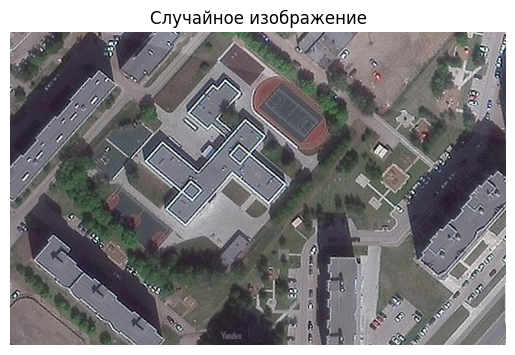

In [50]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Укажите путь к папке с изображениями
image_folder = '/content/dataset_1.0/dataset_1.0/train/images'

# Получите список всех файлов в папке
image_files = os.listdir(image_folder)

# Отфильтруйте файлы, которые начинаются с "NG3"
ng3_files = [f for f in image_files if f.startswith("NG3")]

# Выберите случайное изображение из отфильтрованного списка
random_image = random.choice(ng3_files) if ng3_files else None

# Получите полный путь к выбранному изображению
image_path = os.path.join(image_folder, random_image) if random_image else None

# Загрузите и отобразите выбранное изображение
try:
    if image_path:
        image = cv2.imread(image_path)

        # Проверьте, удалось ли загрузить изображение
        if image is not None:
            # Отобразите изображение с помощью matplotlib
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Случайное изображение')
            plt.axis('off')
            plt.show()
        else:
            print(f'Не удалось загрузить изображение по пути: {image_path}')
    else:
        print('Нет файлов, начинающихся с NG3.')
except Exception as e:
    print(f'Произошла ошибка при загрузке изображения: {str(e)}')


In [51]:
# Importing necessary libraries
import os
import shutil

# Function to check and move unmatching image-label pairs
def check_and_move_unmatching(image_folder, label_folder, quarantine_folder):
    moved_files = []

    image_files = set(os.path.splitext(f)[0] for f in os.listdir(image_folder))
    label_files = set(os.path.splitext(f)[0] for f in os.listdir(label_folder))

    unmatching_images = image_files - label_files
    unmatching_labels = label_files - image_files

    for img in unmatching_images:
        src = os.path.join(image_folder, img + '.jpg')
        dst = os.path.join(quarantine_folder, 'unmatching_images', img + '.jpg')
        shutil.move(src, dst)
        moved_files.append(img + '.jpg')

    for lbl in unmatching_labels:
        src = os.path.join(label_folder, lbl + '.txt')
        dst = os.path.join(quarantine_folder, 'unmatching_labels', lbl + '.txt')
        shutil.move(src, dst)
        moved_files.append(lbl + '.txt')

    return moved_files

# Function to check for empty label files
def check_and_move_empty(label_folder, quarantine_folder):
    empty_files = []

    for lbl_file in os.listdir(label_folder):
        path = os.path.join(label_folder, lbl_file)
        if os.path.getsize(path) == 0:
            dst = os.path.join(quarantine_folder, 'empty_labels', lbl_file)
            shutil.move(path, dst)
            empty_files.append(lbl_file)

    return empty_files

# Define paths from data.yaml output
train_image_folder = '/content/dataset_1.0/dataset_1.0/train/images'
train_label_folder = '/content/dataset_1.0/dataset_1.0/train/labels'
val_image_folder = '/content/dataset_1.0/dataset_1.0/valid/images'
val_label_folder = '/content/dataset_1.0/dataset_1.0/valid/labels'
test_image_folder = '/content/dataset_1.0/dataset_1.0/test/images'
test_label_folder = '/content/dataset_1.0/dataset_1.0/test/labels'


# Quarantine folder
quarantine_folder = '/content/quarantine'

# Create subfolders in quarantine folder if they do not exist
os.makedirs(os.path.join(quarantine_folder, 'unmatching_images'), exist_ok=True)
os.makedirs(os.path.join(quarantine_folder, 'unmatching_labels'), exist_ok=True)
os.makedirs(os.path.join(quarantine_folder, 'empty_labels'), exist_ok=True)

# Check and move unmatching and empty files
moved_train = check_and_move_unmatching(train_image_folder, train_label_folder, quarantine_folder)
moved_val = check_and_move_unmatching(val_image_folder, val_label_folder, quarantine_folder)
moved_test = check_and_move_unmatching(test_image_folder, test_label_folder, quarantine_folder)

empty_train = check_and_move_empty(train_label_folder, quarantine_folder)
empty_val = check_and_move_empty(val_label_folder, quarantine_folder)
empty_test = check_and_move_empty(test_label_folder, quarantine_folder)

moved_train, moved_val, moved_test, empty_train, empty_val, empty_test


([],
 [],
 [],
 ['NG3_83.txt', 'NG3_155.txt', 'NG3_84.txt', 'NG3_82.txt', 'NG3_81.txt'],
 [],
 [])

In [52]:
# Функция для вывода содержимого карантинной папки и списка пустых файлов
def print_quarantine_report(quarantine_folder):
    unmatching_images = os.listdir(os.path.join(quarantine_folder, 'unmatching_images'))
    unmatching_labels = os.listdir(os.path.join(quarantine_folder, 'unmatching_labels'))
    empty_labels = os.listdir(os.path.join(quarantine_folder, 'empty_labels'))

    print("Отчёт о карантинной папке:")
    print("----------------------------")
    print(f"Несоответствующие изображения: {len(unmatching_images)} файлов")
    for img in unmatching_images:
        print(f"  - {img}")

    print(f"\nНесоответствующие метки: {len(unmatching_labels)} файлов")
    for lbl in unmatching_labels:
        print(f"  - {lbl}")

    print(f"\nПустые файлы меток: {len(empty_labels)} файлов")
    for lbl in empty_labels:
        print(f"  - {lbl}")
    print("----------------------------")

# Путь к карантинной папке
quarantine_folder = '/content/quarantine'

# Вывод отчёта
print_quarantine_report(quarantine_folder)


Отчёт о карантинной папке:
----------------------------
Несоответствующие изображения: 27 файлов
  - DS1_YM2_306.jpg
  - DS1_02_2147.jpg
  - DS1_02_0454.jpg
  - DS1_02_0499.jpg
  - DS1_YM2_327.jpg
  - DS1_02_0461.jpg
  - DS1_02_0050.jpg
  - DS1_02_0437.jpg
  - DS1_02_0043.jpg
  - DS1_02_0414.jpg
  - DS1_02_0040.jpg
  - DS1_02_0676.jpg
  - DS1_02_0034.jpg
  - DS1_02_0420.jpg
  - DS1_9_281.jpg
  - DS1_02_2862.jpg
  - DS1_02_0423.jpg
  - DS1_02_0443.jpg
  - DS1_02_0490.jpg
  - DS1_02_0448.jpg
  - DS1_02_0027.jpg
  - DS1_02_0465.jpg
  - DS1_02_0494.jpg
  - DS1_02_0432.jpg
  - DS1_02_0518.jpg
  - DS1_9_285.jpg
  - DS1_02_0469.jpg

Несоответствующие метки: 0 файлов

Пустые файлы меток: 10 файлов
  - NG3_83.txt
  - NG3_84.jpg
  - NG3_155.txt
  - NG3_81.jpg
  - NG3_82.jpg
  - NG3_155.jpg
  - NG3_84.txt
  - NG3_83.jpg
  - NG3_82.txt
  - NG3_81.txt
----------------------------


In [53]:
# Импорт необходимых библиотек
import os

# Функция для проверки наличия пары .jpg для пустого .txt файла
def check_and_move_unmatched_jpgs(empty_label_folder, image_folders, quarantine_folder):
    no_pair_files = []
    for txt_file in os.listdir(empty_label_folder):
        base_name = os.path.splitext(txt_file)[0]  # Получаем имя файла без расширения
        has_pair = False  # Флаг наличия пары

        # Проверяем наличие пары в каждой из папок с изображениями (train, val, test)
        for img_folder in image_folders:
            jpg_file_path = os.path.join(img_folder, base_name + '.jpg')
            if os.path.exists(jpg_file_path):
                has_pair = True
                # Если нашли пару, переносим .jpg файл в карантин
                quarantine_jpg_path = os.path.join(quarantine_folder, base_name + '.jpg')
                os.rename(jpg_file_path, quarantine_jpg_path)
                break

        if not has_pair:
            no_pair_files.append(base_name + '.txt')

    return no_pair_files

# Определение путей
quarantine_folder = '/content/quarantine/empty_labels'  # Папка, где уже лежат пустые .txt файлы
image_folders = [  # Папки с изображениями в датасете
    '/content/dataset_1.0/dataset_1.0/train/images',
    '/content/dataset_1.0/dataset_1.0/valid/images',
    '/content/dataset_1.0/dataset_1.0/test/images'
]

# Вызов функции и получение списка файлов, для которых не нашлось пары
no_pair_files = check_and_move_unmatched_jpgs(quarantine_folder, image_folders, quarantine_folder)

# Вывод отчета
if len(no_pair_files) == 0:
    print("Для всех пустых .txt файлов найдены соответствующие .jpg файлы.")
else:
    print("Для следующих .txt файлов не найдены соответствующие .jpg файлы:")
    for f in no_pair_files:
        print("  - " + f)


Для следующих .txt файлов не найдены соответствующие .jpg файлы:
  - NG3_155.txt
  - NG3_84.txt
  - NG3_83.txt
  - NG3_82.txt
  - NG3_81.txt


In [55]:
import os
import shutil

def find_and_remove_box_labels(label_folder, image_folder, quarantine_folder):
    box_labels = []
    box_images = []

    # Check each label file in the label folder
    for label_file in os.listdir(label_folder):
        label_path = os.path.join(label_folder, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                # Check if the line has 5 values (indicative of a bounding box annotation)
                if len(line.split()) == 5:
                    box_labels.append(label_file)
                    # Find the corresponding image file (assuming .jpg extension for images)
                    image_file = os.path.splitext(label_file)[0] + '.jpg'
                    box_images.append(image_file)
                    break

    # Move the identified box labels and their corresponding images to the quarantine folder
    for label in box_labels:
        src_label = os.path.join(label_folder, label)
        dest_label = os.path.join(quarantine_folder, label)
        shutil.move(src_label, dest_label)

    for image in box_images:
        src_image = os.path.join(image_folder, image)
        dest_image = os.path.join(quarantine_folder, image)
        shutil.move(src_image, dest_image)

    return box_labels, box_images

# Define paths from data.yaml output
train_image_folder = '/content/dataset_1.0/dataset_1.0/train/images'
train_label_folder = '/content/dataset_1.0/dataset_1.0/train/labels'
val_image_folder = '/content/dataset_1.0/dataset_1.0/valid/images'
val_label_folder = '/content/dataset_1.0/dataset_1.0/valid/labels'
test_image_folder = '/content/dataset_1.0/dataset_1.0/test/images'
test_label_folder = '/content/dataset_1.0/dataset_1.0/test/labels'

# Path to the quarantine folder
quarantine_folder = '/content/quarantine'

# Create quarantine folder if it doesn't exist
os.makedirs(quarantine_folder, exist_ok=True)

# Find and remove box labels and their corresponding images in the training data
box_labels_train, box_images_train = find_and_remove_box_labels(train_label_folder, train_image_folder, quarantine_folder)

# Find and remove box labels and their corresponding images in the validation data
box_labels_val, box_images_val = find_and_remove_box_labels(val_label_folder, val_image_folder, quarantine_folder)

# Find and remove box labels and their corresponding images in the test data
box_labels_test, box_images_test = find_and_remove_box_labels(test_label_folder, test_image_folder, quarantine_folder)


In [56]:
from ultralytics import YOLO

model4 = YOLO('/content/yolov8s-seg.pt')
# Display model information (optional)
model4.info()


YOLOv8s-seg summary: 261 layers, 11821056 parameters, 0 gradients, 42.9 GFLOPs


In [57]:
#тренируем модель
results2 = model4.train(data='/content/data6.yaml', epochs=20, imgsz=640, save=True, project='/content/runs')



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data6.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=/content/runs, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [58]:
#Валидация
from ultralytics import YOLO


# Validate the model
model4.val()  # оцените производительность модели на наборе проверки
metrics = model4.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/dataset_1.0/dataset_1.0/valid/labels.cache... 1435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1435/1435 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/dataset_1.0/dataset_1.0/valid/images/DS1_6-7_2270.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:32<00:00,  2.77it/s]
                   all       1435       4732      0.763        0.6       0.67      0.541      0.744      0.589      0.641      0.471
   Agricultural object       1435        173      0.858       0.85      0.923      0.827      0.868      0.861      0.922      0.823
                Fields       1435        661      0.924      0.877      0.924      0.856      0.923      0.

AttributeError: ignored

In [59]:
model4.predict(source="/content/plant_test.jpg", save=True)  # предсказать по изображению


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Results saved to /content/runs/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([6, 6])
 dtype: torch.float32
  + tensor([[3.00000e+00, 0.00000e+00, 3.96000e+02, 9.90000e+01, 5.94095e-01, 7.00000e+00],
         [0.00000e+00, 6.50000e+01, 7.97000e+02, 4.21000e+02, 4.95225e-01, 4.00000e+00],
         [4.83000e+02, 3.80000e+01, 5.19000e+02, 7.20000e+01, 3.53859e-01, 7.00000e+00],
         [7.50000e+01, 2.80000e+01, 1.17000e+02, 6.50000e+01, 3.50275e-01, 7.00000e+00],
         [3.75000e+02, 1.68000e+02, 5.83000e+02, 3.70000e+02, 3.37034e-01, 7.00000e+00],
         [1.00000e+00, 3.96000e+02, 7.87000e+02, 5.20000e+02, 2.56765e-01, 8.00000e+00]], device='cuda:0')Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Masks'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([6, 448, 640])
 dtype: torch.float32
  + tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
         

In [60]:
model4.predict(source="/content/hotel.jpg", save=True)  # предсказать по изображению


Results saved to /content/runs/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([8, 6])
 dtype: torch.float32
  + tensor([[2.02000e+02, 1.00000e+00, 8.89000e+02, 2.24000e+02, 9.06988e-01, 2.00000e+00],
         [0.00000e+00, 2.60000e+01, 1.29000e+02, 2.09000e+02, 9.01234e-01, 7.00000e+00],
         [0.00000e+00, 4.81000e+02, 3.03000e+02, 6.60000e+02, 7.01629e-01, 7.00000e+00],
         [1.87000e+02, 3.59000e+02, 2.28000e+02, 3.94000e+02, 5.39613e-01, 7.00000e+00],
         [1.39000e+02, 5.91000e+02, 3.07000e+02, 6.66000e+02, 4.16051e-01, 7.00000e+00],
         [9.10000e+01, 3.17000e+02, 1.59000e+02, 3.67000e+02, 3.90534e-01, 7.00000e+00],
         [9.00000e+01, 3.17000e+02, 1.26000e+02, 3.63000e+02, 3.72178e-01, 7.00000e+00],
         [1.20000e+02, 3.24000e+02, 1.60000e+02, 3.70000e+02, 2.53275e-01, 7.00000e+00]], device='cuda:0')Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Masks'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Si

In [61]:

# Define source as YouTube video URL
source = 'https://www.youtube.com/watch?v=PlPlB9C5CYE'

# Run inference on the source
model4.predict(source='https://www.youtube.com/watch?v=PlPlB9C5CYE', stream=True, save=True)  # предсказать по изображению
results=model4


In [62]:
import zipfile

# Путь для упаковки, перенесем всю папку ранс на гугл драйв
folder_path = '/content/runs/'

# имя архива
zip_file = '/content/runs4.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив /content/runs4.zip успешно создан.


In [63]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/runs4.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/runs4.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/.
